# Домашее задание 2

В домашнем задании по классическому зрению мы продолжим работать с естественными изображениями. На этот раз нас будет интересовать изображение *sahrs_on_the_field.jpg*, лежащее в репозитории рядом с ноутбуком. Задание посвящено обработке бинарной маски. Оно состоит из трех частей, начиная с совсем простого и заканчивая тем, которому наверняка нужно будет посвятить некоторое время.

- Загрузите изображение и переведите его в цветовое пространство HSV

- Настройте цветовой фильтр на лежащих на поле роботов. Скорее всего маска получится изрядно зашумленной. Удалите шум с помощью морфологических операций, выводя все промежуточные этапы на экран. Морфологических операций на самом деле много, рекомендуем к чтению документацию https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

- Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку *cv_hw* в своем репозитории.

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sahrs_on_the_field.jpg  sample_data


In [6]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

WIND_X = 800
WIND_Y = 500

#canvas = np.ones((WIND_X, WIND_Y, 3), np.uint8) * 50

canvas = cv2.imread("sahrs_on_the_field.jpg")# [100:500, 200:300, :]

#plt.pause(0.05)
#plt.clf()

In [7]:
print(canvas.shape, type(canvas[0, 0, 0]))

(1280, 720, 3) <class 'numpy.uint8'>


(1280, 720, 3)


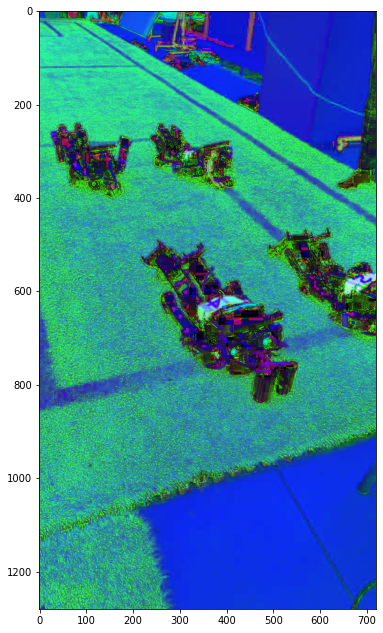

In [8]:
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
print(img.shape)
plt.figure(figsize=(12, 11))
plt.imshow(img)
plt.show()

In [15]:
import cv2
import time
import math
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
 
def f(hl, sl, vl, hh, sh, vh):
    # canvas = np.zeros ((WIND_Y, WIND_X, 3), np.uint8)

    # canvas[:, :, 0] = r
    # canvas[:, :, 1] = g
    # canvas[:, :, 2] = b
    
    mask = cv2.inRange(img, (hl, sl, vl), (hh, sh, vh))

    plt.figure (figsize=(12, 10))
    plt.imshow (mask, cmap="gray")
    plt.show ()
    plt.pause (0.05)
    plt.clf ()
 
interactive_plot = interactive(f, hl = (0, 255, 1), sl = (0, 255, 1), vl = (0, 255, 1),
                                  hh = (0, 255, 1), sh = (0, 255, 1), vh = (0, 255, 1))

output = interactive_plot.children[-1]
output.layout.height = str (WIND_Y) + 'px'
output.layout.width = str (WIND_X) + 'px'
interactive_plot

interactive(children=(IntSlider(value=127, description='hl', max=255), IntSlider(value=127, description='sl', …

In [ ]:
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

#print(img.shape)

plt.figure(figsize=(12, 11))

#color scheme (gray)
plt.imshow(img)
plt.show()

mask = cv2.inRange(img, (120, 130, 80), (230, 250, 200))

plt.figure(figsize=(12, 11))
plt.imshow(mask, cmap="gray")
plt.show()